In [2]:
import pandas as pd
df = pd.read_csv("Purchase.csv")
df.head()

,Company,GST No,State,State Code,City,Address,Zip Code,PAN,CIN,Customer,...,CESS Tax Percentage,CESS Tax,Total TCS (?),Discount (?),Delivery Charge (?),Total Amount (?),Invoice Total (?),Raw Material ID,Raw Material Code,Description
0,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,SHOEB FAIM SHAIKH,...,0.0,0.0,0.0,0.0,0.0,4400.0,7310.0,16704437.0,NaN,NaN
1,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,SHOEB FAIM SHAIKH,...,0.0,0.0,NaN,NaN,NaN,2475.0,NaN,16704438.0,NaN,NaN
2,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,SHOEB FAIM SHAIKH,...,0.0,0.0,NaN,NaN,NaN,435.0,NaN,16704456.0,NaN,NaN
3,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,Bhakti Catering,...,0.0,0.0,0.0,0.0,0.0,1650.0,1650.0,16704128.0,NaN,NaN
4,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,Lagoon General Stores,...,0.0,0.0,0.0,0.0,0.0,200.0,200.0,16704023.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3811 entries, 0 to 3810
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company                   2832 non-null   object 
 1   GST No                    0 non-null      float64
 2   State                     2832 non-null   object 
 3   State Code                2832 non-null   float64
 4   City                      2832 non-null   object 
 5   Address                   2832 non-null   object 
 6   Zip Code                  2832 non-null   float64
 7   PAN                       0 non-null      float64
 8   CIN                       0 non-null      float64
 9   Customer                  2832 non-null   object 
 10  Customer Address          56 non-null     object 
 11  GST No.1                  61 non-null     object 
 12  Phone                     0 non-null      float64
 13  Email                     0 non-null      float64
 14  Type    

In [4]:
columns_to_drop = ['Sap Code', 'Phone', 'Email','PAN','CIN','GST No']
df = df.drop(columns=columns_to_drop)
df.head()

,Company,State,State Code,City,Address,Zip Code,Customer,Customer Address,GST No.1,Type,...,CESS Tax Percentage,CESS Tax,Total TCS (?),Discount (?),Delivery Charge (?),Total Amount (?),Invoice Total (?),Raw Material ID,Raw Material Code,Description
0,Main Store,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,SHOEB FAIM SHAIKH,NaN,NaN,Purchase,...,0.0,0.0,0.0,0.0,0.0,4400.0,7310.0,16704437.0,NaN,NaN
1,Main Store,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,SHOEB FAIM SHAIKH,NaN,NaN,Purchase,...,0.0,0.0,NaN,NaN,NaN,2475.0,NaN,16704438.0,NaN,NaN
2,Main Store,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,SHOEB FAIM SHAIKH,NaN,NaN,Purchase,...,0.0,0.0,NaN,NaN,NaN,435.0,NaN,16704456.0,NaN,NaN
3,Main Store,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,Bhakti Catering,NaN,NaN,Purchase,...,0.0,0.0,0.0,0.0,0.0,1650.0,1650.0,16704128.0,NaN,NaN
4,Main Store,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,Lagoon General Stores,NaN,NaN,Purchase,...,0.0,0.0,0.0,0.0,0.0,200.0,200.0,16704023.0,NaN,NaN


In [5]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26060\2165434525.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])


In [6]:
# Create a new column for total tax
df['Total Tax'] = df['CGST Tax (?)'] + df['SGST Tax/Excise Duty (?)'] + df['IGST Tax/VAT Amount (?)'] + df['CESS Tax']

# Create a new column for total cost
df['Total Cost'] = df['Pre Tax Amount (?)'] + df['Total Tax'] - df['Discount (?)'] + df['Delivery Charge (?)']

# Create a new column for month
df['Month'] = df['Invoice Date'].dt.month

# Create a new column for year
df['Year'] = df['Invoice Date'].dt.year

In [7]:
df.head()

,Company,State,State Code,City,Address,Zip Code,Customer,Customer Address,GST No.1,Type,...,Delivery Charge (?),Total Amount (?),Invoice Total (?),Raw Material ID,Raw Material Code,Description,Total Tax,Total Cost,Month,Year
0,Main Store,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,SHOEB FAIM SHAIKH,NaN,NaN,Purchase,...,0.0,4400.0,7310.0,16704437.0,NaN,NaN,0.0,4400.0,1.0,2024.0
1,Main Store,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,SHOEB FAIM SHAIKH,NaN,NaN,Purchase,...,NaN,2475.0,NaN,16704438.0,NaN,NaN,0.0,NaN,1.0,2024.0
2,Main Store,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,SHOEB FAIM SHAIKH,NaN,NaN,Purchase,...,NaN,435.0,NaN,16704456.0,NaN,NaN,0.0,NaN,1.0,2024.0
3,Main Store,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,Bhakti Catering,NaN,NaN,Purchase,...,0.0,1650.0,1650.0,16704128.0,NaN,NaN,0.0,1650.0,1.0,2024.0
4,Main Store,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,Lagoon General Stores,NaN,NaN,Purchase,...,0.0,200.0,200.0,16704023.0,NaN,NaN,0.0,200.0,1.0,2024.0


In [14]:
# Sales trends analysis
sales_trends = df.groupby(df['Invoice Date'].dt.to_period('M')).agg({'Total Amount (?)': 'sum'})
print("Sales Trends:")
print(sales_trends)

# Top selling products
top_selling_products = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop Selling Products:")
print(top_selling_products)

# Customer behavior analysis
customer_behavior = df.groupby('Customer').agg({'Total Amount (?)': 'sum', 'Quantity': 'sum'}).sort_values(by='Total Amount (?)', ascending=False)
print("\nCustomer Behavior Analysis:")
customer_behavior.head()

Sales Trends:
              Total Amount (?)
Invoice Date                  
2024-01             3493386.54

Top Selling Products:
Category
Beverages           19389.00
Non Food            15969.00
Grocery             13356.95
Food Ingredients     9451.75
Vegetable            8577.85
Name: Quantity, dtype: float64

Customer Behavior Analysis:


,Total Amount (?),Quantity
Customer,,
Zomato Hyperpure Pvt.Ltd.Mumbai,474022.89,2684.45
Sanoj Singh,399875.00,8309.20
SHOEB FAIM SHAIKH,244297.00,320.80
ADARSH MASALA & CO.,228844.08,731.75
PUSHKARRAM TRADING,194625.00,2696.00


In [13]:
# Sales trends analysis
sales_trends = df.groupby(df['Invoice Date'].dt.to_period('M')).agg({'Total Amount (?)': 'sum'})
print("Sales Trends:")
print(sales_trends)

# Top selling products
top_selling_products = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop Selling Products:")
print(top_selling_products)

# Customer behavior analysis
customer_behavior = df.groupby('Customer').agg({'Total Amount (?)': 'sum', 'Quantity': 'sum'}).sort_values(by='Total Amount (?)', ascending=False)
print("\nCustomer Behavior Analysis:")
customer_behavior.head()

Sales Trends:
              Total Amount (?)
Invoice Date                  
2024-01             3493386.54

Top Selling Products:
Category
Beverages           19389.00
Non Food            15969.00
Grocery             13356.95
Food Ingredients     9451.75
Vegetable            8577.85
Name: Quantity, dtype: float64

Customer Behavior Analysis:


,Total Amount (?),Quantity
Customer,,
Zomato Hyperpure Pvt.Ltd.Mumbai,474022.89,2684.45
Sanoj Singh,399875.00,8309.20
SHOEB FAIM SHAIKH,244297.00,320.80
ADARSH MASALA & CO.,228844.08,731.75
PUSHKARRAM TRADING,194625.00,2696.00


In [15]:
# Convert the 'Invoice Date' column to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Group by 'Category', 'Invoice Date', and sum the 'Quantity' to find the total quantity sold for each category on each day
most_sold_category = df.groupby(['Category', df['Invoice Date'].dt.date])['Quantity'].sum().sort_values(ascending=False).head(10)
print("The categories of food sold the most on each day are:")
print(most_sold_category)

The categories of food sold the most on each day are:
Category   Invoice Date
Non Food   2024-01-29      4623.0
           2024-01-15      4020.0
Beverages  2024-01-09      3591.0
           2024-01-28      3265.0
           2024-01-19      2224.0
Non Food   2024-01-02      2175.0
Beverages  2024-01-23      2040.0
Grocery    2024-01-11      2021.0
Beverages  2024-01-04      1800.0
Non Food   2024-01-20      1702.0
Name: Quantity, dtype: float64


NameError: name 'plt' is not defined

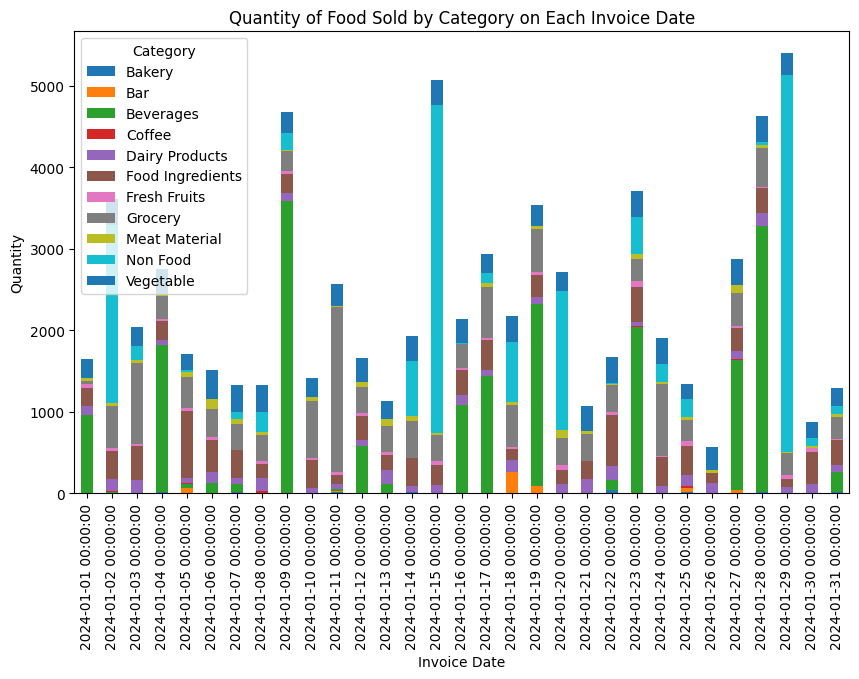

In [16]:
# Convert the 'Invoice Date' column to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Group by 'Invoice Date' and 'Category', and sum the 'Quantity' to find the total quantity sold for each category on each day
df_grouped = df.groupby(['Invoice Date', 'Category'])['Quantity'].sum().reset_index()

# Pivot the data to create a table with 'Invoice Date' as the index, 'Category' as the columns, and 'Quantity' as the values
df_pivot = df_grouped.pivot(index='Invoice Date', columns='Category', values='Quantity')

# Create a stacked bar plot
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and axis labels
ax.set_title('Quantity of Food Sold by Category on Each Invoice Date')
ax.set_xlabel('Invoice Date')
ax.set_ylabel('Quantity')

# Show the plot
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26060\3537689775.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])


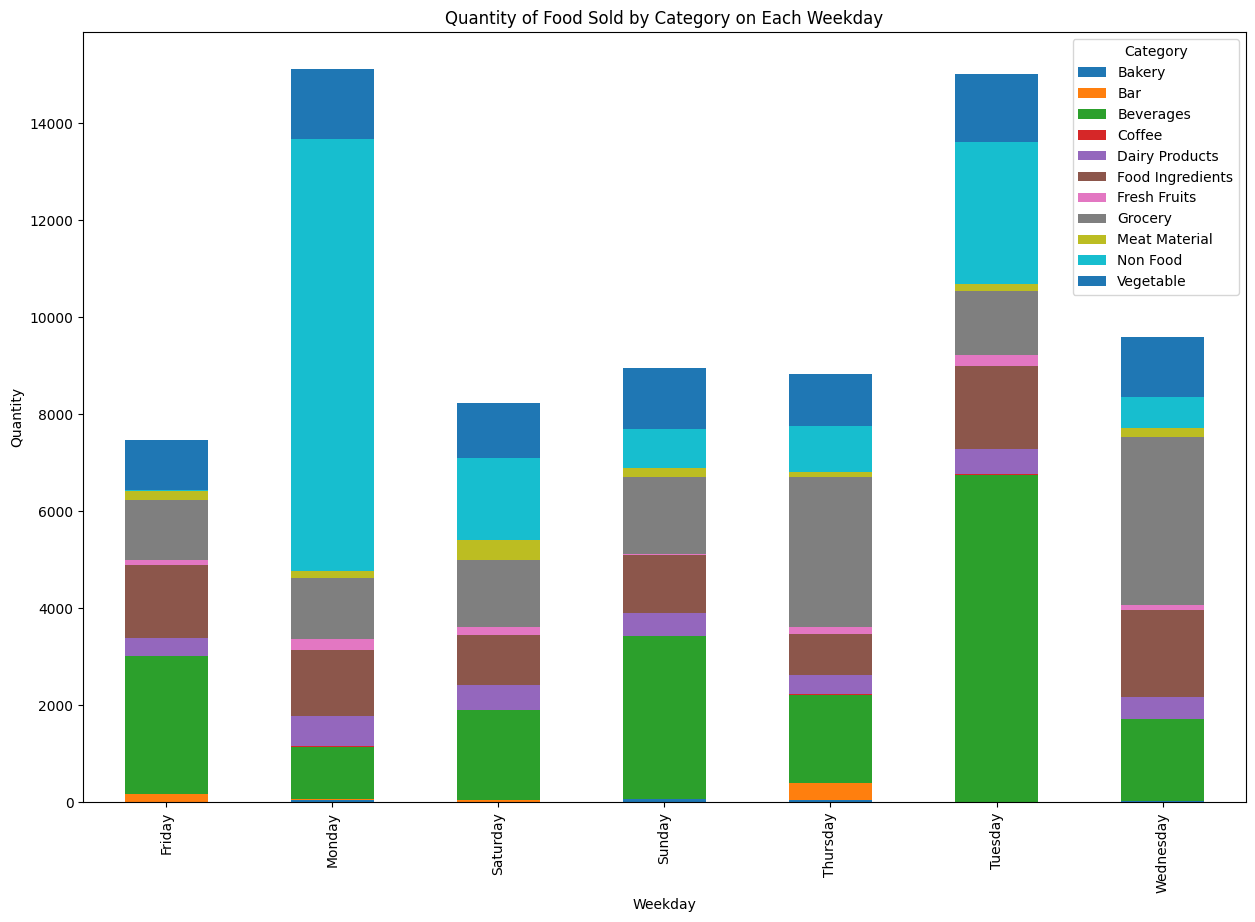

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Purchase.csv')

# Convert the 'Invoice Date' column to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Extract the weekday from the 'Invoice Date' column
df['Weekday'] = df['Invoice Date'].dt.day_name()

# Group by 'Weekday' and 'Category', and sum the 'Quantity' to find the total quantity sold for each category on each day
df_grouped = df.groupby(['Weekday', 'Category'])['Quantity'].sum().reset_index()

# Create a bar plot
fig, ax = plt.subplots(figsize=(15, 10))
df_grouped.pivot(index='Weekday', columns='Category', values='Quantity').plot(kind='bar', stacked=True, ax=ax)

# Set the title and axis labels
ax.set_title('Quantity of Food Sold by Category on Each Weekday')
ax.set_xlabel('Weekday')
ax.set_ylabel('Quantity')

# Show the plot
plt.show()

Non food is the most selling on Monday, so keep the stock ready on Sunday
On tuesday, Bevrages is the most selling, so keep the stock ready on Monday.

In [19]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Purchase.csv')

# Convert the 'Invoice Date' column to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Extract the weekday from the 'Invoice Date' column
df['Weekday'] = df['Invoice Date'].dt.day_name()

# Group by 'Weekday' and 'Category', and sum the 'Quantity'
df_grouped = df.groupby(['Weekday', 'Category'])['Quantity'].sum()

# Create the JSON data structure
weekdays_json = df_grouped.to_json(orient='index')

# Print or save the JSON output
print(weekdays_json)
# Or, to save as a file:
# with open('weekdays_data.json', 'w') as f:
#     f.write(weekdays_json)


{"('Friday', 'Bakery')":2.0,"('Friday', 'Bar')":168.0,"('Friday', 'Beverages')":2849.0,"('Friday', 'Coffee')":5.0,"('Friday', 'Dairy Products')":366.0,"('Friday', 'Food Ingredients')":1506.0,"('Friday', 'Fresh Fruits')":105.8,"('Friday', 'Grocery')":1228.0,"('Friday', 'Meat Material')":181.3,"('Friday', 'Non Food')":32.0,"('Friday', 'Vegetable')":1031.35,"('Monday', 'Bakery')":46.0,"('Monday', 'Bar')":12.0,"('Monday', 'Beverages')":1080.0,"('Monday', 'Coffee')":24.0,"('Monday', 'Dairy Products')":616.0,"('Monday', 'Food Ingredients')":1365.0,"('Monday', 'Fresh Fruits')":212.75,"('Monday', 'Grocery')":1277.5,"('Monday', 'Meat Material')":137.1,"('Monday', 'Non Food')":8895.0,"('Monday', 'Vegetable')":1455.55,"('Saturday', 'Bar')":55.0,"('Saturday', 'Beverages')":1843.0,"('Saturday', 'Coffee')":12.0,"('Saturday', 'Dairy Products')":509.0,"('Saturday', 'Food Ingredients')":1022.0,"('Saturday', 'Fresh Fruits')":181.1,"('Saturday', 'Grocery')":1380.0,"('Saturday', 'Meat Material')":396.5,"(

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26060\632145654.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])


In [30]:
pd.set_option('display.max_columns',None)
df.head()

,Company,GST No,State,State Code,City,Address,Zip Code,PAN,CIN,Customer,Customer Address,GST No.1,Phone,Email,Type,Invoice No.,MRN/PO No.,Invoice Date,Raw Material,Category,Sub Category,HSN Code,Sap Code,Unit,Quantity,Price (?),Pre Tax Amount (?),CGST Tax Percentage,CGST Tax (?),SGST Tax Percentage,SGST Tax/Excise Duty (?),IGST Tax/VAT Percentage,IGST Tax/VAT Amount (?),CESS Tax Percentage,CESS Tax,Total TCS (?),Discount (?),Delivery Charge (?),Total Amount (?),Invoice Total (?),Raw Material ID,Raw Material Code,Description,Weekday,Total_Revenue,Total_Cost,Profit,Profit_Percentage
0,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,SHOEB FAIM SHAIKH,NaN,NaN,NaN,NaN,Purchase,615/JAN,5221.0,2024-01-20,Tiger Prawns,Meat Material,Sea Food,0.0,NaN,Kg,4.0,1100.0,4400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4400.0,7310.0,16704437.0,NaN,NaN,Saturday,4400.0,4400.0,0.0,0.0
1,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,SHOEB FAIM SHAIKH,NaN,NaN,NaN,NaN,Purchase,615/JAN,5221.0,2024-01-20,Surmay Fish,Meat Material,Sea Food,0.0,NaN,Kg,4.5,550.0,2475.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2475.0,NaN,16704438.0,NaN,NaN,Saturday,2475.0,NaN,NaN,NaN
2,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,SHOEB FAIM SHAIKH,NaN,NaN,NaN,NaN,Purchase,615/JAN,5221.0,2024-01-20,Bombil,Meat Material,Sea Food,0.0,NaN,Kg,2.9,150.0,435.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,435.0,NaN,16704456.0,NaN,NaN,Saturday,435.0,NaN,NaN,NaN
3,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,Bhakti Catering,NaN,NaN,NaN,NaN,Purchase,62/JAN,5220.0,2024-01-20,Chapati For Staff,Grocery,NaN,0.0,NaN,PCS,300.0,5.5,1650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1650.0,1650.0,16704128.0,NaN,NaN,Saturday,1650.0,1650.0,0.0,0.0
4,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,Lagoon General Stores,NaN,NaN,NaN,NaN,Purchase,61/JAN,5219.0,2024-01-20,Oreo Biscuit,Grocery,NaN,0.0,NaN,PKT,20.0,10.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,200.0,16704023.0,NaN,NaN,Saturday,200.0,200.0,0.0,0.0


In [28]:
# Calculate total revenue
df['Total_Revenue'] = df['Quantity'] * df['Price (?)']

# Calculate total cost
df['Total_Cost'] = df['Quantity'] * (df['Price (?)'] - df['Discount (?)'])

# Calculate profit
df['Profit'] = df['Total_Revenue'] - df['Total_Cost']

# Calculate profit percentage
df['Profit_Percentage'] = (df['Profit'] / df['Total_Revenue']) * 100

# Group by category and calculate profit and profit percentage
grouped_df = df.groupby('Category').agg({
    'Profit': 'sum',
    'Profit_Percentage': 'mean'
}).reset_index()

# Print the results
print(grouped_df)

            Category    Profit  Profit_Percentage
0             Bakery       0.0           0.000000
1                Bar  118325.0          31.168804
2          Beverages       0.0           0.000000
3             Coffee       0.0           0.000000
4     Dairy Products       0.0           0.000000
5   Food Ingredients       0.0           0.000000
6       Fresh Fruits       0.0           0.000000
7            Grocery       0.0           0.000000
8      Meat Material       0.0           0.000000
9           Non Food       0.0           0.000000
10         Vegetable       0.0           0.000000


In [31]:
import seaborn as sns

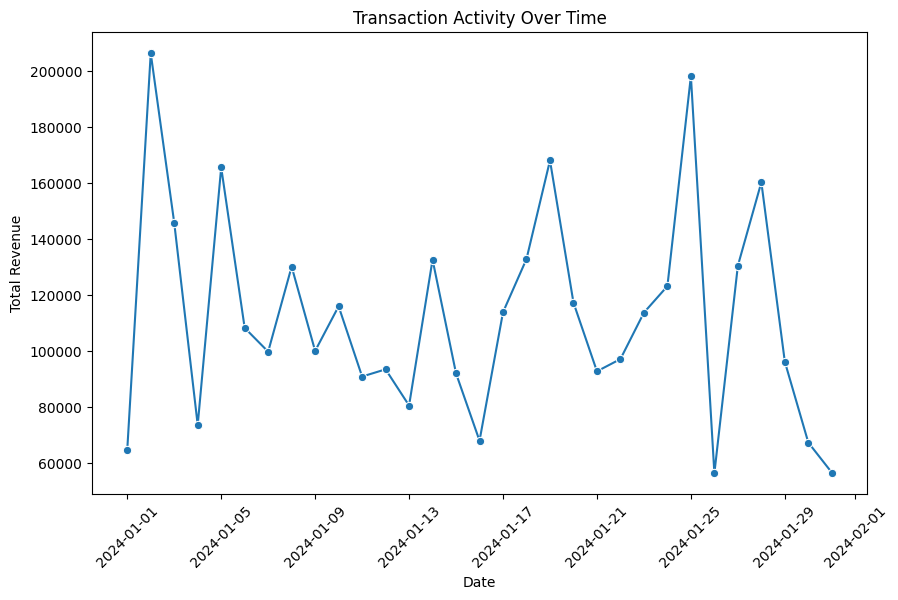

In [38]:
transaction_by_day = df.groupby('Invoice Date')['Total Amount (?)'].sum().reset_index()

# Visualize transaction activity over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Invoice Date', y='Total Amount (?)', data=transaction_by_day, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Transaction Activity Over Time')
plt.xticks(rotation=45)
plt.show()

In [33]:
df.head()

,Company,GST No,State,State Code,City,Address,Zip Code,PAN,CIN,Customer,Customer Address,GST No.1,Phone,Email,Type,Invoice No.,MRN/PO No.,Invoice Date,Raw Material,Category,Sub Category,HSN Code,Sap Code,Unit,Quantity,Price (?),Pre Tax Amount (?),CGST Tax Percentage,CGST Tax (?),SGST Tax Percentage,SGST Tax/Excise Duty (?),IGST Tax/VAT Percentage,IGST Tax/VAT Amount (?),CESS Tax Percentage,CESS Tax,Total TCS (?),Discount (?),Delivery Charge (?),Total Amount (?),Invoice Total (?),Raw Material ID,Raw Material Code,Description,Weekday,Total_Revenue,Total_Cost,Profit,Profit_Percentage
0,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,SHOEB FAIM SHAIKH,NaN,NaN,NaN,NaN,Purchase,615/JAN,5221.0,2024-01-20,Tiger Prawns,Meat Material,Sea Food,0.0,NaN,Kg,4.0,1100.0,4400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4400.0,7310.0,16704437.0,NaN,NaN,Saturday,4400.0,4400.0,0.0,0.0
1,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,SHOEB FAIM SHAIKH,NaN,NaN,NaN,NaN,Purchase,615/JAN,5221.0,2024-01-20,Surmay Fish,Meat Material,Sea Food,0.0,NaN,Kg,4.5,550.0,2475.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2475.0,NaN,16704438.0,NaN,NaN,Saturday,2475.0,NaN,NaN,NaN
2,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,SHOEB FAIM SHAIKH,NaN,NaN,NaN,NaN,Purchase,615/JAN,5221.0,2024-01-20,Bombil,Meat Material,Sea Food,0.0,NaN,Kg,2.9,150.0,435.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,435.0,NaN,16704456.0,NaN,NaN,Saturday,435.0,NaN,NaN,NaN
3,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,Bhakti Catering,NaN,NaN,NaN,NaN,Purchase,62/JAN,5220.0,2024-01-20,Chapati For Staff,Grocery,NaN,0.0,NaN,PCS,300.0,5.5,1650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1650.0,1650.0,16704128.0,NaN,NaN,Saturday,1650.0,1650.0,0.0,0.0
4,Main Store,NaN,Maharashtra,27.0,Mumbai,"148 B, Juhu Tara Rd,",400049.0,NaN,NaN,Lagoon General Stores,NaN,NaN,NaN,NaN,Purchase,61/JAN,5219.0,2024-01-20,Oreo Biscuit,Grocery,NaN,0.0,NaN,PKT,20.0,10.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,200.0,16704023.0,NaN,NaN,Saturday,200.0,200.0,0.0,0.0
